<a href="https://colab.research.google.com/github/ayush9304/Hotel-Booking-Analysis-EDA/blob/main/Hotel_Booking_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/ayush9304/Hotel-Booking-Analysis-EDA/main/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
print(df.shape)
df.columns

(119390, 32)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
print("Active Reservation status values: ",df[df['is_canceled']==0]['reservation_status'].unique())
print("Cancelled Resrv. status values:",df[df['is_canceled']==1]['reservation_status'].unique())

Active Reservation status values:  ['Check-Out']
Cancelled Resrv. status values: ['Canceled' 'No-Show']


### Bookings by different types of hotels

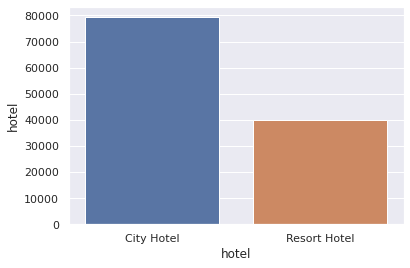

In [8]:
d = df.groupby('hotel')['hotel'].count()
sns.barplot(x=d.index, y=d)

More bookings are made in City Hotels than Resort Hotel

### Counts of Cancelled vs Not-Cancelled Bookings in different types of hotels

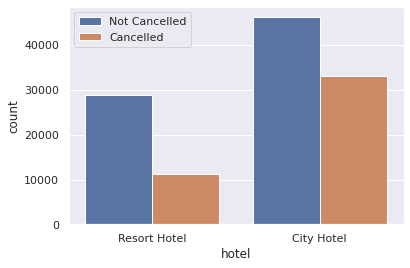

In [9]:
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.legend(['Not Cancelled', 'Cancelled'])

### Booking by year & type of hotel

In [10]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

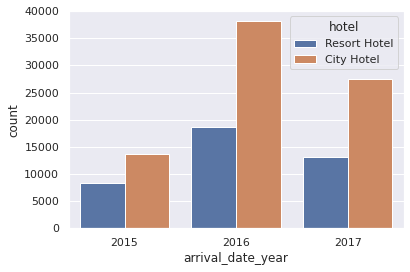

In [11]:
sns.countplot(x='arrival_date_year', hue='hotel', data=df)

### No. of bookings by months of year

In [12]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

Text(0.5, 1.0, 'Bookings by months')

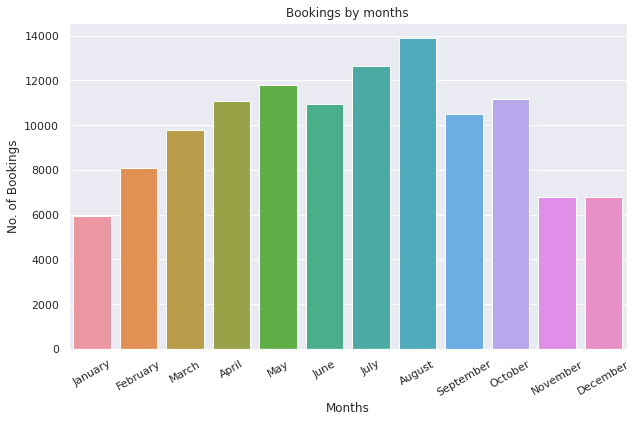

In [13]:
d = df.groupby("arrival_date_month")["arrival_date_month"].count()
plt.figure(figsize=(10,6))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")

November, December, January, February are the month having least bookings. Mid-year months have more bookings

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
d = df['country'].value_counts()
d.describe()

count      177.000000
mean       671.762712
std       3931.154035
min          1.000000
25%          2.000000
50%         12.000000
75%         74.000000
max      48590.000000
Name: country, dtype: float64

## Booking Status by country

In [16]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

#### Top 20 countries by number of bookings

In [17]:
# Total distribution of guests by country
# plt.figure(figsize=(10,10))
# p = plt.pie(d, labels=d.index, autopct="%.0f%%")

Text(0.5, 1.0, 'Top 20 countries by number of guests')

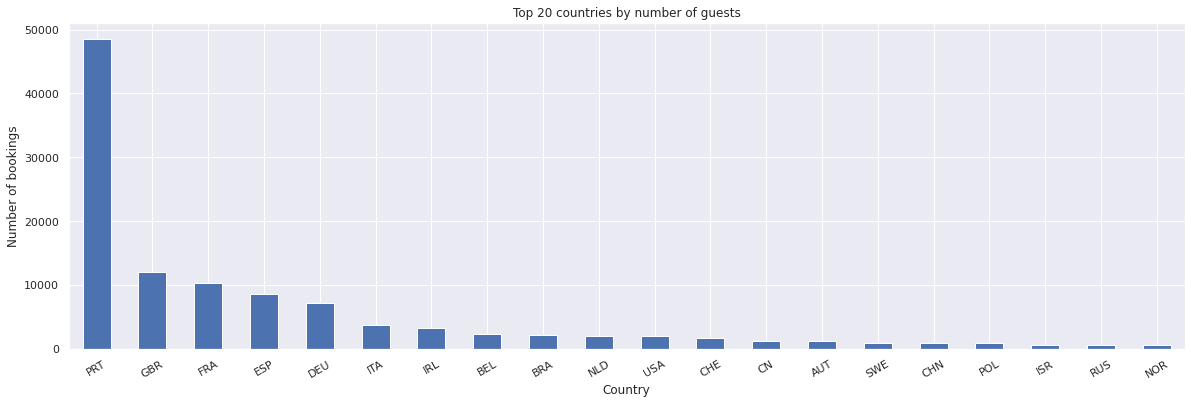

In [18]:
plt.figure(figsize=(20,6))
d.sort_values(ascending=False)[:20].plot(kind='bar')
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Number of bookings")
plt.title("Top 20 countries by number of guests")

The country of Portugal (PRT) has significantly higher number of bookings compared to any other countries.

### Booking type by country (Top 15)

Text(0.5, 1.0, 'Booked Hotel type by country')

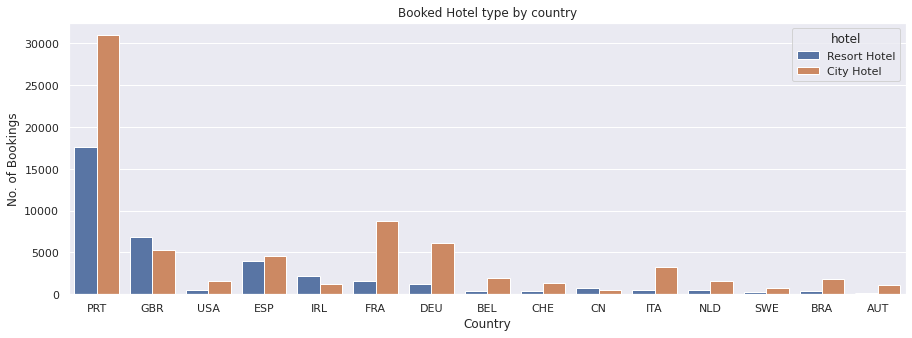

In [19]:
d = df['country'].value_counts().sort_values(ascending=False)[:15]
plt.figure(figsize=(15,5))
sns.countplot(x='country', hue='hotel', data=df[df['country'].isin(d.index)])
plt.xlabel("Country")
plt.ylabel("No. of Bookings")
plt.title("Booked Hotel type by country")

Guests form Portugal (PRT) from where most bookings are made prefers City Hotels over Resort Hotels. Whereas guests from Britain (GBR), country with second highest bookings prefers Resort Hotels more.

## Daily Rate by Hotel type

In [20]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Daily Rate by hotel type')

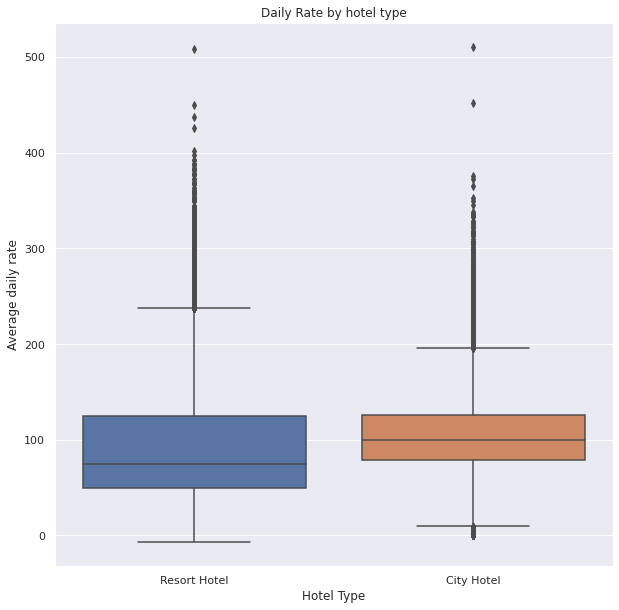

In [21]:
plt.figure(figsize=(10,10))
df2 = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)  # Removed an extreme outlier (adr=5400) that made boxplot very squeezed to view
sns.boxplot(x='hotel', y='adr', data = df2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

We can see that the avg daily rate for Resort Hotels are more spread compared to City Hotels although have lesser median rate.

Text(0.5, 1.0, 'Daily rate by hotel type')

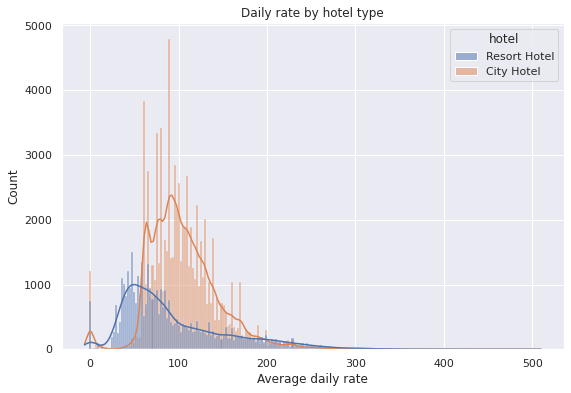

In [22]:
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=df2, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

In [23]:
df[df['adr']==5400]    # Removed Booking Row that is extreme outlier ('Average daily rate')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,Non Refund,12.0,NaN,0,Transient,5400.0,0,0,Canceled,2016-02-19


### Price variation over the year

In [24]:
d = df2.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)

In [25]:
d

,hotel,arrival_date_month,adr
4,City Hotel,January,82.628986
16,Resort Hotel,January,49.461883
3,City Hotel,February,85.088278
15,Resort Hotel,February,55.171930
7,City Hotel,March,91.821162
19,Resort Hotel,March,57.520147
0,City Hotel,April,111.251838
12,Resort Hotel,April,77.849496
20,Resort Hotel,May,78.758134
8,City Hotel,May,121.638560


Text(0.5, 1.0, 'Average Daily rate by months')

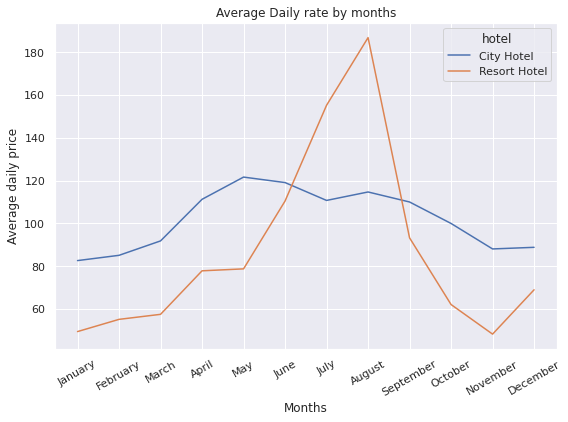

In [26]:
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=d)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

We can see mid-year months have higher daily prices which is obvious as No. of bookings for mid-year months are high.

### Daily Rate by customer types

Text(0.5, 1.0, 'Daily rate by customer type')

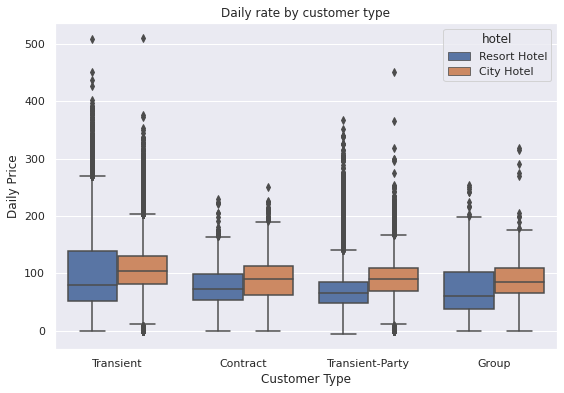

In [27]:
plt.figure(figsize=(9,6))
sns.boxplot(x='customer_type', y='adr', hue='hotel', data=df2)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

### Average Daily Rate trend over three years

In [28]:
def get_month(x):
  pre = ''
  if months.index(x)<9:
    pre = '0'
  return pre+str(months.index(x)+1)

def get_day(x):
  pre = ''
  if x<10:
    pre = '0'
  return pre+str(x)

In [29]:
df2['arrival_date'] = df2.arrival_date_year.apply(lambda x: str(x))+"-"+df2.arrival_date_month.apply(get_month)+"-"+df2.arrival_date_day_of_month.apply(get_day)
df2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


Text(0.5, 1.0, 'Average daily rate trend over three years')

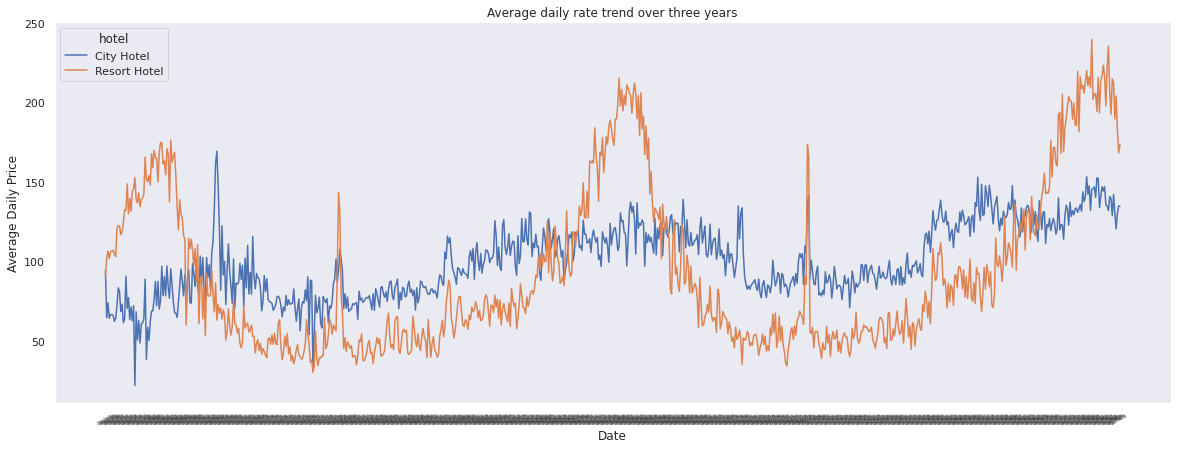

In [30]:
d = df2.groupby(['hotel','arrival_date'])['adr'].mean().reset_index().sort_values('arrival_date')
# fig = plt.figure(figsize=(20,7))
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='arrival_date', y='adr', hue='hotel', data=d)
plt.xlabel("Date")
plt.ylabel("Average Daily Price")
plt.grid()
# fig.autofmt_xdate()
p = plt.xticks(rotation=30)
ax.tick_params(axis='x', labelsize=3)
plt.title("Average daily rate trend over three years")

Here we observe that Highest daily price (for each year) is increasing every year.

### Bookings by market segment

Text(0.5, 1.0, 'Bookings by market segment')

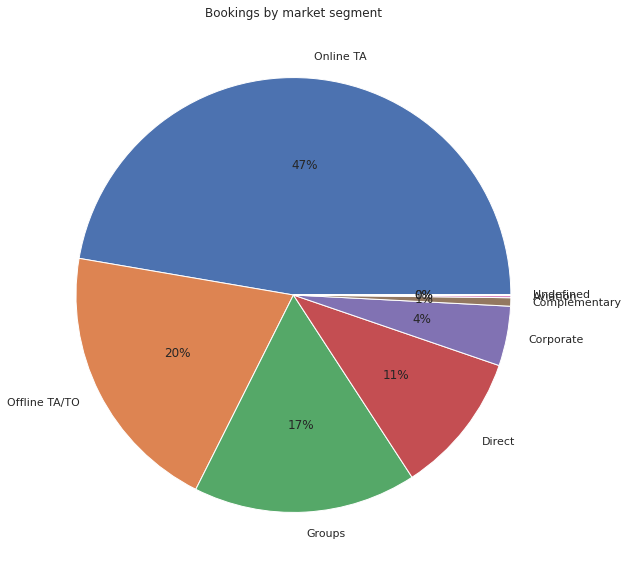

In [31]:
d = df['market_segment'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by market segment")

Almost half of bookings was done through Online Travel Agents (TA). More than 90% bookings was done by Online TA, Offline TA/TO, Groups & Direct.

### Bookings by distribution channel

Text(0.5, 1.0, 'Bookings by distribution channel')

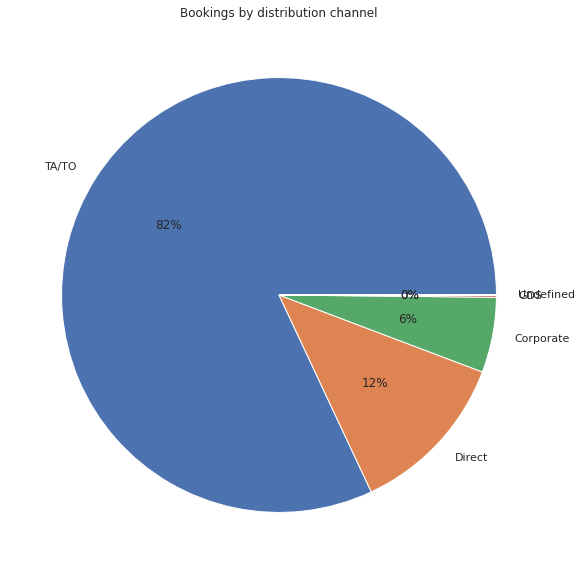

In [32]:
d = df['distribution_channel'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Bookings by distribution channel")

Majority of bookings are done through TA/TO.

### Percentage of bookings with meals

Text(0.5, 1.0, 'Portion of bookings with meals and its type')

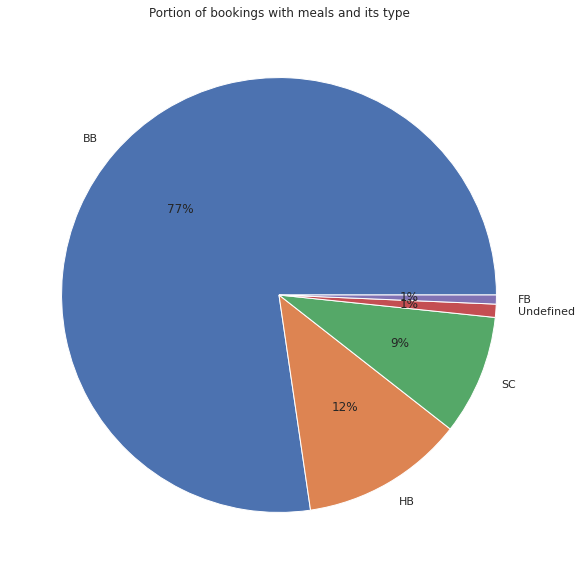

In [33]:
d = df['meal'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Portion of bookings with meals and its type")

Almost 90% of total guests books meal in their bookings, among which majority books meal of type BB.

## No. of days in advanced of booking the hotel

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

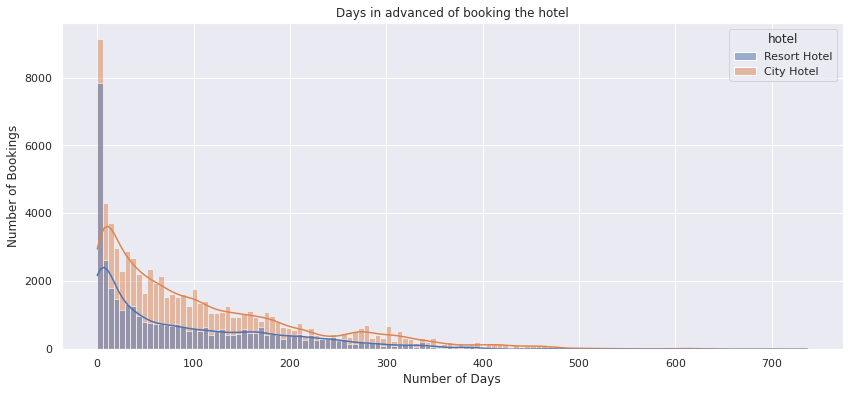

In [34]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=df2, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

As expected most bookings are done within 100 days of check-in date to hotel.

## Advanced booking vs Daily Rate

In [35]:
d = df2.groupby(['hotel','lead_time']).agg({'adr': 'mean'}).rename(columns={'adr':'mean_adr'}).reset_index()

Text(0, 0.5, 'Daily Rate')

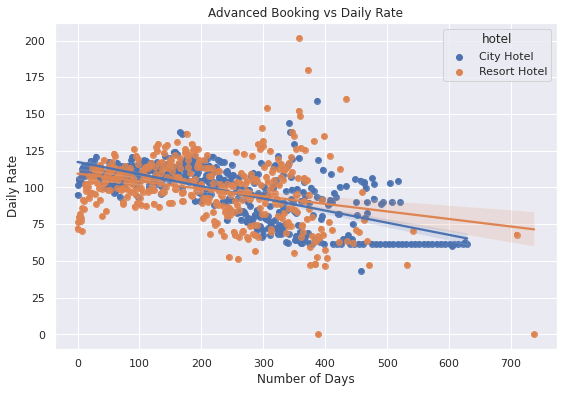

In [36]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='lead_time', y='mean_adr', hue='hotel', data=d)
plt.title("Advanced Booking vs Daily Rate")
sns.regplot(x='lead_time', y='mean_adr', data=d[d['hotel']=='City Hotel'])
sns.regplot(x='lead_time', y='mean_adr', data=d[d['hotel']=='Resort Hotel'])
plt.xlabel("Number of Days")
plt.ylabel("Daily Rate")

Not very strong but there is a downward trend that longer lead time have less daily rate

In [37]:
# plt.figure(figsize=(20,6))
# sns.scatterplot(x='lead_time', y='adr', hue='hotel', data=df2)
# plt.xlabel("Number of Days")
# plt.ylabel("Daily Rate")
# plt.title("Advanced Booking vs Daily Rate")

In [38]:
df2['days_stayed'] = df2.stays_in_weekend_nights+df2.stays_in_week_nights

Text(0.5, 1.0, 'Number of days stayed vs Daily Rate')

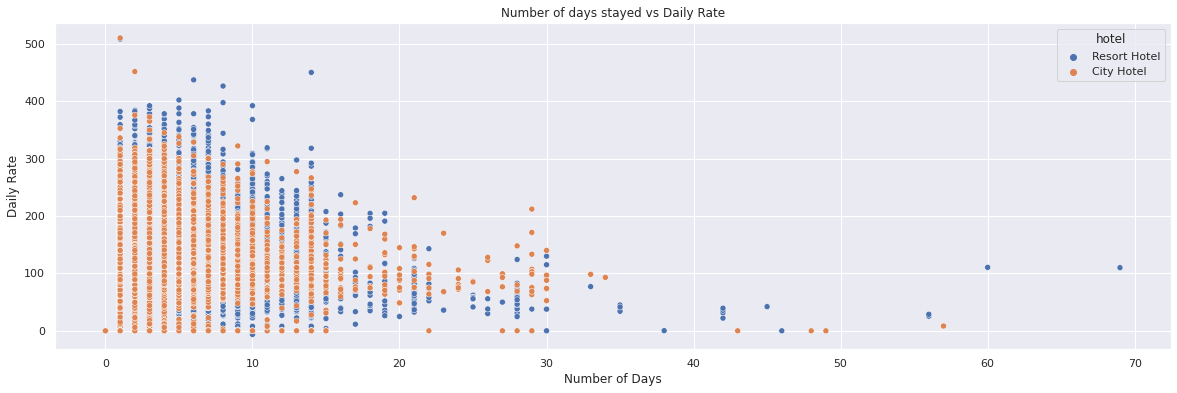

In [39]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='days_stayed', y='adr', hue='hotel', data=df2)
plt.xlabel("Number of Days")
plt.ylabel("Daily Rate")
plt.title("Number of days stayed vs Daily Rate")

Although smaller lead time bookings has wide range of daily rates from cheap to expensive, but still there seems a downward trend that longer stay time leads to less daily rate.

## Special Requests

### Special Requests by country

Text(0.5, 1.0, 'Top 50 countries by average number of special requests')

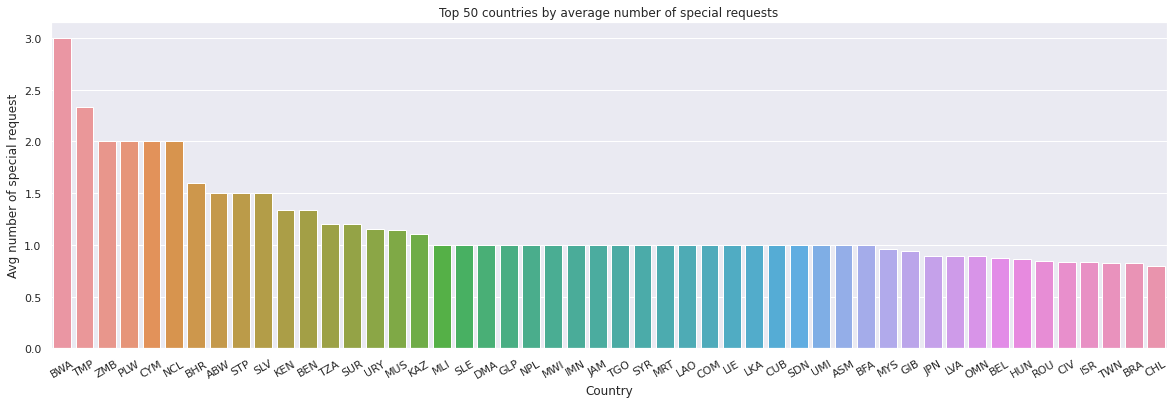

In [40]:
d = df.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:50]
plt.figure(figsize=(20,6))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Avg number of special request")
plt.title("Top 50 countries by average number of special requests")

### Special Requests by customer type

Text(0.5, 1.0, 'Average number of special requests by customer type')

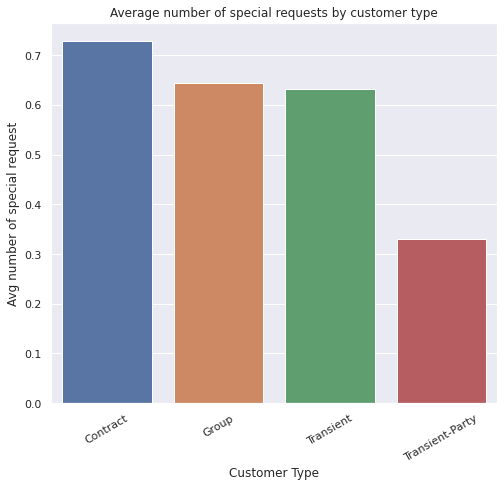

In [41]:
d = df.groupby("customer_type")['total_of_special_requests'].mean()
plt.figure(figsize=(8,7))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Customer Type")
plt.ylabel("Avg number of special request")
plt.title("Average number of special requests by customer type")

In [42]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'days_stayed'],
      dtype='object')

### Average Special Requests made per guest across months in a year

Text(0.5, 1.0, 'Avg Special Requests made pre guest across months in a year')

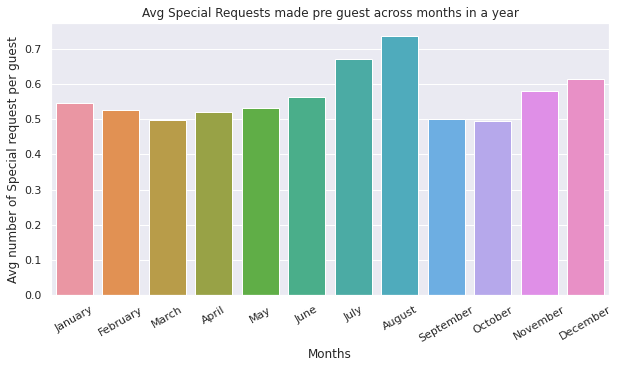

In [43]:
d = df.groupby('arrival_date_month')['total_of_special_requests'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=d.index, y=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("Avg number of Special request per guest")
plt.title("Avg Special Requests made pre guest across months in a year")

Almost similar number of special request per guest with slightly more requests in July, August & December.

### Hotel Preference by customer type

Text(0.5, 1.0, 'Hotel Preference by customer type')

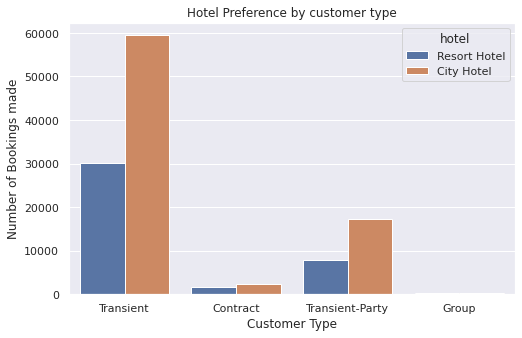

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='customer_type', hue='hotel', data=df)
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings made")
plt.title("Hotel Preference by customer type")

Almost every customer type makes more bookings in City Hotels compared to Resort Hotel.

### Days stayed by different market segment

Text(0.5, 1.0, 'Week Days stayed by different market segment')

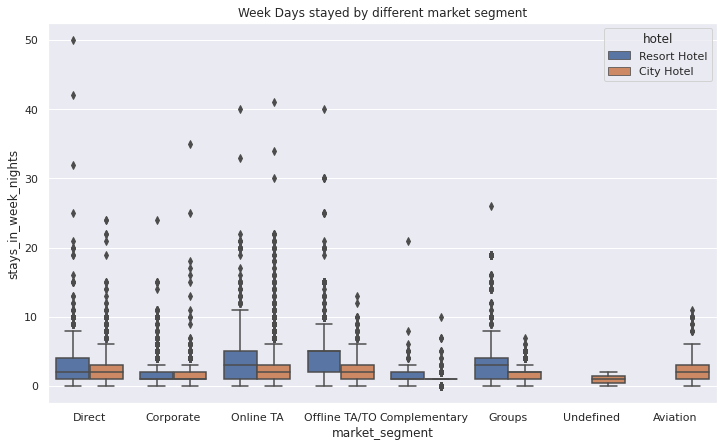

In [45]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", hue = "hotel", data = df)
plt.title("Week Days stayed by different market segment")

Text(0.5, 1.0, 'Weekend Days stayed by different market segment')

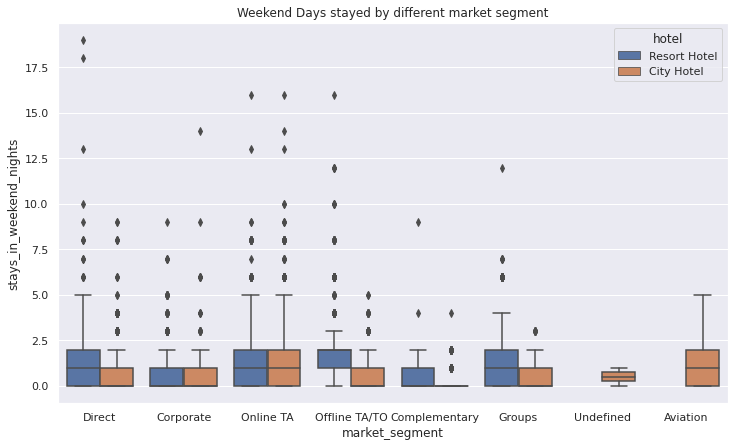

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", hue = "hotel", data = df)
plt.title("Weekend Days stayed by different market segment")

Looking at the distribution, most people do not seem to prefer to stay at the hotel for more than 1 week. But it seems normal to stay in resort hotels for more than a week. Although this changes according to the segments, staying longer than 15 days certainly creates outliers for each segment.